In [43]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
users = [
    {"id":0 , "name":"Hero"},
    {"id":1 , "name":"Dunn"},
    {"id":2 , "name":"Sue"},
    {"id":3 , "name":"Chi"},
    {"id":4 , "name":"Thor"},
    {"id":5 , "name":"Clive"},
    {"id":6 , "name":"Hicks"},
    {"id":7 , "name":"Devin"},
    {"id":8 , "name":"Kate"},
    {"id":9 , "name":"Klein"}
]

friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
              (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]  # note that friendships are not directed, 
                                                    # then (0,1) and (1,0) would be the same
                                                    # thus here only one option is displayed
                                                    # to avoid duplicates

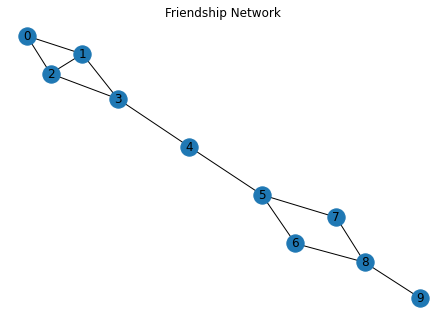

In [21]:
from_ = [x[0] for x in friendships]
to_ = [x[1] for x in friendships]

data = pd.DataFrame({"from": from_ , "to": to_})

G = nx.from_pandas_edgelist(data, 'from', 'to')
nx.draw(G, with_labels=True)
plt.title('Friendship Network')
plt.show()

In [27]:
# Adding the 'friends' property to 'users' dictionary
for user in users:
    user['friends']=[]

for i,j in friendships:
    users[i]['friends'].append(users[j]['id']) # Only adding friend ID to avoid a Circular list
    users[j]['friends'].append(users[i]['id']) # friendship tuples are bidirectional

In [28]:
users

[{'id': 0, 'name': 'Hero', 'friends': [1, 2]},
 {'id': 1, 'name': 'Dunn', 'friends': [0, 2, 3]},
 {'id': 2, 'name': 'Sue', 'friends': [0, 1, 3]},
 {'id': 3, 'name': 'Chi', 'friends': [1, 2, 4]},
 {'id': 4, 'name': 'Thor', 'friends': [3, 5]},
 {'id': 5, 'name': 'Clive', 'friends': [4, 6, 7]},
 {'id': 6, 'name': 'Hicks', 'friends': [5, 8]},
 {'id': 7, 'name': 'Devin', 'friends': [5, 8]},
 {'id': 8, 'name': 'Kate', 'friends': [6, 7, 9]},
 {'id': 9, 'name': 'Klein', 'friends': [8]}]

In [51]:
# Calculating "Average number of connections"
def number_of_friends(user):
    return len(user['friends']) # return lenght of list

In [35]:
total_conections = sum(number_of_friends(user) for user in users ) # inner argument is a generator

num_users = len(users)

avg_connections = total_conections / num_users

print(avg_connections)

2.4


In [42]:
# sorting users by number of connections
sorted(users, key= lambda x : len(x['friends']), reverse=True) # using lambda to calculate key value item-wise

[{'id': 1, 'name': 'Dunn', 'friends': [0, 2, 3]},
 {'id': 2, 'name': 'Sue', 'friends': [0, 1, 3]},
 {'id': 3, 'name': 'Chi', 'friends': [1, 2, 4]},
 {'id': 5, 'name': 'Clive', 'friends': [4, 6, 7]},
 {'id': 8, 'name': 'Kate', 'friends': [6, 7, 9]},
 {'id': 0, 'name': 'Hero', 'friends': [1, 2]},
 {'id': 4, 'name': 'Thor', 'friends': [3, 5]},
 {'id': 6, 'name': 'Hicks', 'friends': [5, 8]},
 {'id': 7, 'name': 'Devin', 'friends': [5, 8]},
 {'id': 9, 'name': 'Klein', 'friends': [8]}]

In [47]:
# Creating a adjacent matrix
matrix = np.zeros((len(users), len(users)))

for i,j in friendships:
    matrix[i][j] = 1
    matrix[j][i] = 1

In [49]:
data = pd.DataFrame(matrix)

In [56]:
data['Num. of Connections'] = data.apply(lambda x : sum(x), axis=1)

In [66]:
G = nx.from_pandas_adjacency(data.iloc[:,:10])

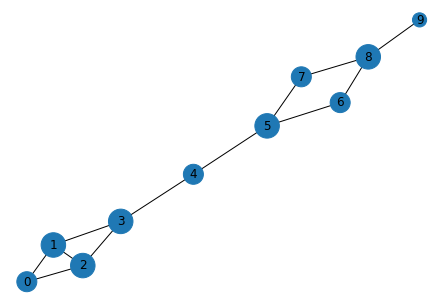

In [82]:
#nx.draw_networkx()
nx.draw(G,with_labels=True, node_size=(data['Num. of Connections']*200),)